In [44]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
sb.set()

# Load Data
steam_data = pd.read_csv('games.csv')

#### Variable selection

In [45]:
# Data Preprocessing
# Convert 'Release date' to datetime, extract the year, and calculate the game's age
current_year = pd.to_datetime('today').year
steam_data['Release date'] = pd.to_datetime(steam_data['Release date'], errors='coerce')
steam_data['Game Age'] = current_year - steam_data['Release date'].dt.year


# Feature Selection
features = ['Price', 'DLC count', 'Metacritic score', 'User score', 'Achievements', 'Game Age']

#### Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Target Variable Creation
# 'Positive Above Median' is 1 if the count of positive reviews is above the median, 0 otherwise
# 'Negative Above Median' is 1 if the count of negative reviews is above the median, 0 otherwise
median_positive = steam_data['Positive'].median()
median_negative = steam_data['Negative'].median()

steam_data['Positive Above Median'] = (steam_data['Positive'] > median_positive).astype(int)
steam_data['Negative Above Median'] = (steam_data['Negative'] > median_negative).astype(int)

# Feature and Target Preparation
# 'X' contains the independent variables/features selected for prediction
# 'y_pos_binary' and 'y_neg_binary' are the binary target variables for positive and negative reviews
X = steam_data[features]
y_pos_binary = steam_data['Positive Above Median']
y_neg_binary = steam_data['Negative Above Median']

# Data Splitting
# Split the dataset into training and testing sets for both positive and negative reviews
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X, y_pos_binary, test_size=0.2, random_state=42)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X, y_neg_binary, test_size=0.2, random_state=42)

# Model Training
# Train a Decision Tree Classifier on the training data for predicting positive reviews
clf_pos = DecisionTreeClassifier(random_state=42)
clf_pos.fit(X_train_pos, y_train_pos)

# Train a Decision Tree Classifier on the training data for predicting negative reviews
clf_neg = DecisionTreeClassifier(random_state=42)
clf_neg.fit(X_train_neg, y_train_neg)

# Prediction Phase
# Predict the binary classification of reviews on the test data
y_pred_pos_binary = clf_pos.predict(X_test_pos)
y_pred_neg_binary = clf_neg.predict(X_test_neg)

# Model Evaluation
# Evaluate and print the accuracy and classification report for the positive review predictions
accuracy_pos = accuracy_score(y_test_pos, y_pred_pos_binary)
report_pos = classification_report(y_test_pos, y_pred_pos_binary)
print(f'Accuracy for Positive Reviews: {accuracy_pos}')
print(f'Classification Report for Positive Reviews:\n{report_pos}')

# Evaluate and print the accuracy and classification report for the negative review predictions
accuracy_neg = accuracy_score(y_test_neg, y_pred_neg_binary)
report_neg = classification_report(y_test_neg, y_pred_neg_binary)
print(f'Accuracy for Negative Reviews: {accuracy_neg}')
print(f'Classification Report for Negative Reviews:\n{report_neg}')

Accuracy for Positive Reviews: 0.7296281064567299
Classification Report for Positive Reviews:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8760
           1       0.76      0.65      0.70      8261

    accuracy                           0.73     17021
   macro avg       0.73      0.73      0.73     17021
weighted avg       0.73      0.73      0.73     17021

Accuracy for Negative Reviews: 0.7570648023030374
Classification Report for Negative Reviews:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      9393
           1       0.75      0.68      0.71      7628

    accuracy                           0.76     17021
   macro avg       0.76      0.75      0.75     17021
weighted avg       0.76      0.76      0.76     17021



Accuracy: 72.96%
This means that about 72.96% of the time, the model correctly predicts whether a review is above (1) or below (0) the median count of positive reviews

Precision (for class 0 is 0.71, for class 1 is 0.76):
Precision tells you the accuracy of positive predictions. For example, when the model predicts a review is below the median (class 0), it is correct 71% of the time. When it predicts above the median (class 1), it is correct 76% of the time.

Recall (for class 0 is 0.80, for class 1 is 0.65):
Recall indicates the ability of the model to find all the relevant cases within a dataset. For instance, the model identifies 80% of the actual below-median reviews (class 0) and 65% of the above-median reviews (class 1).

F1-Score (for class 0 is 0.75, for class 1 is 0.70):
The F1 score is a harmonic mean of precision and recall, providing a balance between the two. It's particularly useful when the class distribution is uneven. A higher F1 score indicates a better balance between precision and recall.

Support:
This is the number of actual occurrences of the class in the specified dataset. For class 0, there are 8760 instances, and for class 1, there are 8261 instances.

Model: Positive Reviews Model
True Positives (TP) for 'Above Median': 5377
True Negatives (TN) for 'Below Median': 7042
False Positives (FP) for 'Below Median': 1718
False Negatives (FN) for 'Above Median': 2884
True Positive Rate (Recall) for 'Above Median': 0.65
True Negative Rate for 'Below Median': 0.80
Model: Negative Reviews Model
True Positives (TP) for 'Above Median': 5174
True Negatives (TN) for 'Below Median': 7712
False Positives (FP) for 'Below Median': 1681
False Negatives (FN) for 'Above Median': 2454
True Positive Rate (Recall) for 'Above Median': 0.68
True Negative Rate for 'Below Median': 0.82


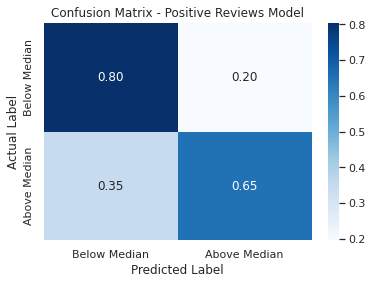

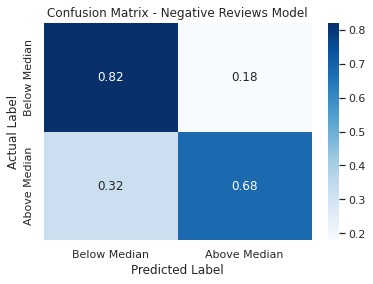

In [47]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title, model_label):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Assigning TP, FP, FN, and TN from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    # Normalizing confusion matrix for display
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sb.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{title} - {model_label}")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

    # Printing the results with model indication
    print(f"Model: {model_label}")
    print(f"True Positives (TP) for '{classes[1]}': {TP}")
    print(f"True Negatives (TN) for '{classes[0]}': {TN}")
    print(f"False Positives (FP) for '{classes[0]}': {FP}")
    print(f"False Negatives (FN) for '{classes[1]}': {FN}")
    print(f"True Positive Rate (Recall) for '{classes[1]}': {TP / (TP + FN):.2f}")
    print(f"True Negative Rate for '{classes[0]}': {TN / (TN + FP):.2f}")
    plt.show()

# Visualization of Confusion Matrix with Counts for Positive Reviews
plot_confusion_matrix(y_test_pos, y_pred_pos_binary, ['Below Median', 'Above Median'], 'Confusion Matrix', 'Positive Reviews Model')

# Visualization of Confusion Matrix with Counts for Negative Reviews
plot_confusion_matrix(y_test_neg, y_pred_neg_binary, ['Below Median', 'Above Median'], 'Confusion Matrix', 'Negative Reviews Model')

Both models are performing moderately well, with the model for negative reviews slightly outperforming the model for positive reviews in terms of recall and the true negative rate.

However, both models have a significant number of false negatives, indicating that they might be too conservative and miss identifying some above-median reviews.

#### Saving the model

In [48]:
import joblib

# Save the models
joblib.dump(clf_pos, 'decision_tree_pos_model.joblib')
joblib.dump(clf_neg, 'decision_tree_neg_model.joblib')

['decision_tree_neg_model.joblib']

#### If we launch 10 games, based on the model:

In [49]:
# Load your new data
new_data = pd.read_csv('sample.csv')

# Data Preprocessing
# Convert 'Release date' to datetime, extract the year, and calculate the game's age
current_year = pd.to_datetime('today').year
new_data['Release date'] = pd.to_datetime(steam_data['Release date'], errors='coerce')
new_data['Game Age'] = current_year - steam_data['Release date'].dt.year


# Train set medians
median_positive = steam_data['Positive'].median()
median_negative = steam_data['Negative'].median()
print(f"Median Positive Reviews from steam_data: {median_positive}")
print(f"Median Negative Reviews from steam_data: {median_negative}")
      
# List of features used by the model
features = ['Price', 'DLC count', 'Metacritic score', 'User score', 'Achievements', 'Game Age']

# Check if all features are in the new data
missing_features = [f for f in features if f not in new_data.columns]
if missing_features:
    print("Missing features:", missing_features)
else:
    print("All features are present from new_data.")

    
print()
try:
    new_data['Predicted Positive Review'] = clf_pos.predict(new_data[features])
    new_data['Predicted Negative Review'] = clf_neg.predict(new_data[features])
    print("Predictions added to new_data dataframe.")
except Exception as e:
    print("Error occurred during prediction:", str(e))


    
print()    
# Display predictions
#print(new_data[['Predicted Positive Review', 'Predicted Negative Review']])

# Update the predictions with descriptive labels
new_data['Predicted Positive Review'] = new_data['Predicted Positive Review'].map({1: 'Above Median', 0: 'Below Median'})
new_data['Predicted Negative Review'] = new_data['Predicted Negative Review'].map({1: 'Above Median', 0: 'Below Median'})

# Display the updated dataframe with descriptive labels for predictions
new_data[['Name','Predicted Positive Review','Predicted Negative Review','Release date','Game Age','Price','DLC count','Metacritic score','User score','Achievements',]]

Median Positive Reviews from steam_data: 7.0
Median Negative Reviews from steam_data: 2.0
All features are present from new_data.

Predictions added to new_data dataframe.



,Name,Predicted Positive Review,Predicted Negative Review,Release date,Game Age,Price,DLC count,Metacritic score,User score,Achievements
0,Game A,Above Median,Above Median,2008-10-21,16,19.99,2,85,8.0,30
1,Game B,Above Median,Above Median,2017-10-12,7,29.99,5,90,9.0,45
2,Game C,Below Median,Below Median,2021-11-17,3,0.00,0,60,7.0,10
3,Game D,Above Median,Above Median,2020-07-23,4,15.99,3,88,8.5,50
4,Game E,Above Median,Above Median,2020-02-03,4,59.99,10,92,9.5,60
5,Game F,Above Median,Below Median,2021-02-26,3,24.99,1,82,8.2,15
6,Game G,Above Median,Above Median,2022-01-09,2,34.99,0,65,6.5,0
7,Game H,Above Median,Above Median,2022-05-05,2,0.99,2,88,8.8,30
8,Game I,Above Median,Above Median,2020-04-02,4,9.99,1,54,5.4,20
9,Game J,Above Median,Above Median,2014-11-11,10,44.99,4,78,7.8,25


Predicted Positive Review 'Above Median': This suggests that the game is expected to have more positive reviews than the median game in the training dataset.

Predicted Negative Review 'Above Median': On the other hand, a prediction that a game will have more negative reviews than the median could be a negative indicator.


**Game F** is an example that fits this description. It is predicted to have:

Positive Reviews 'Above Median': Suggesting it is expected to have a higher number of positive reviews compared to the median game, which can be indicative of good reception or quality.

Negative Reviews 'Below Median': Indicating that it is expected to have fewer negative reviews than the median, suggesting fewer complaints or issues perceived by players.

#### Random Forest to determine the importance of the feature:

Training: When the Random Forest is trained on a dataset, it randomly selects subsets of features and data points to build each tree. This randomness helps to make the model robust and prevent overfitting.

Feature Importances Calculation: The importance of a feature is measured by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. The impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the model's way of "voting" for the most iFnformative features.

Normalization: These importance scores are then normalized so that the sum of all scores is equal to 1.

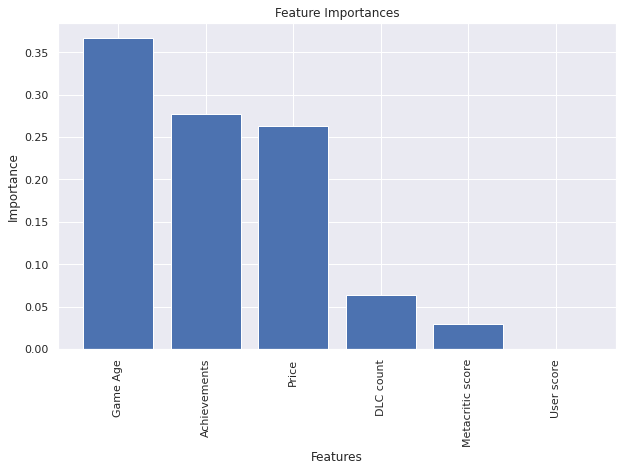

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(steam_data[features])
y = steam_data['Positive Above Median']  # Assuming this target variable is already defined and has no missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the Random Forest model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_names = features
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The importance score reflects how much each feature contributes to the model's predictions.

The bars represent the importance of each feature. A longer bar means the feature is more important for the model when making predictions.

Even if the correlation coefficients are low, the feature importances derived from the model suggest that these features do contribute to the predictive power of the model, although not all equally.
